In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("preprocessed_placement.csv")

In [3]:
dataset

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,67.00,91.00,58.00,55.0,58.80,270000.000000,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,79.33,78.33,77.48,86.5,66.28,200000.000000,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,65.00,68.00,64.00,75.0,57.80,250000.000000,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,56.00,52.00,52.00,66.0,59.43,288655.405405,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,85.80,73.60,73.30,96.8,55.50,425000.000000,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.000000,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,58.00,60.00,72.00,74.0,53.62,275000.000000,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,67.00,67.00,73.00,59.0,69.72,295000.000000,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,74.00,66.00,58.00,70.0,60.23,204000.000000,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [4]:
import seaborn as sns

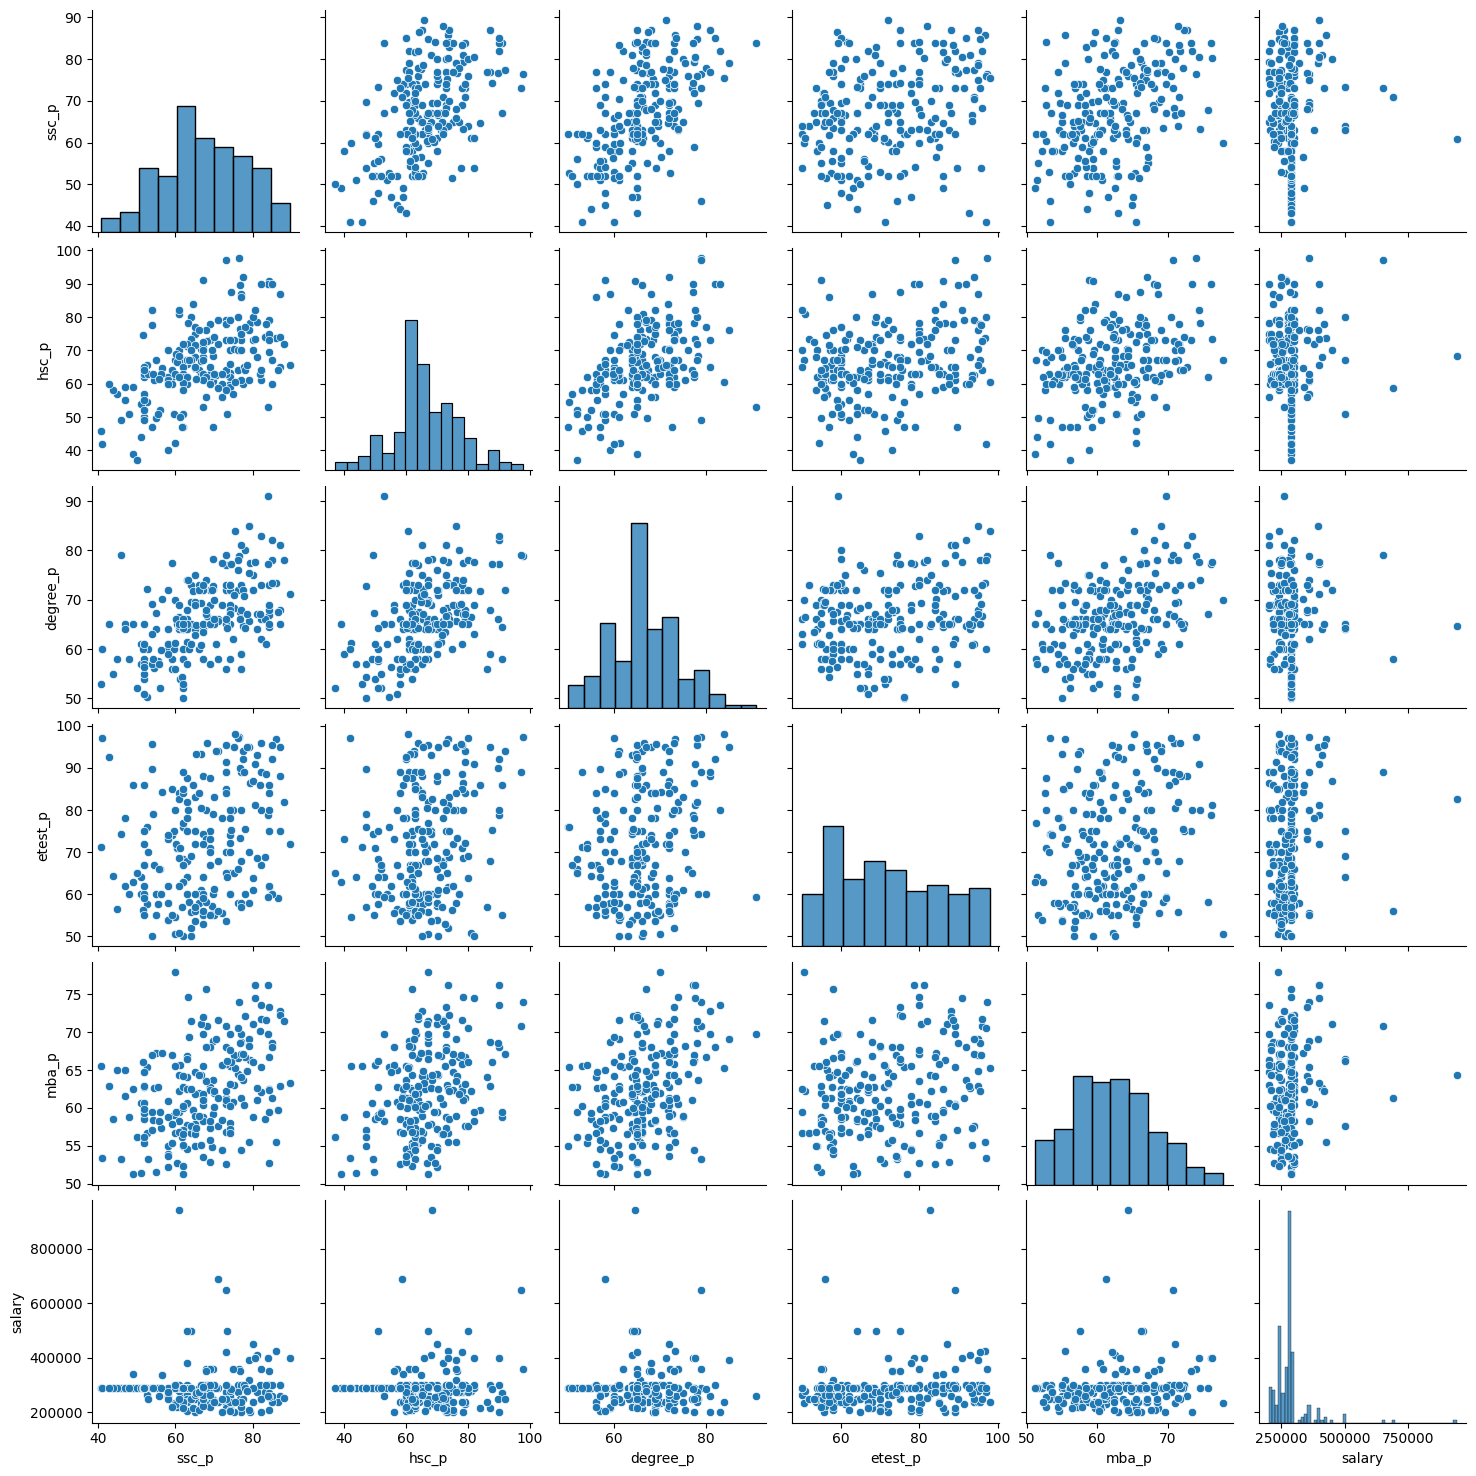

In [5]:
sns.pairplot(dataset)

In [10]:
def quan_qual(dataset):
    quan , qual = [], []
    for i in dataset.columns:
        if dataset[i].dtype == 'O':
            qual.append(i)
        else:
            quan.append(i)
    return quan, qual
            
        

In [12]:
quan, qual = quan_qual(dataset)

In [13]:
quan

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

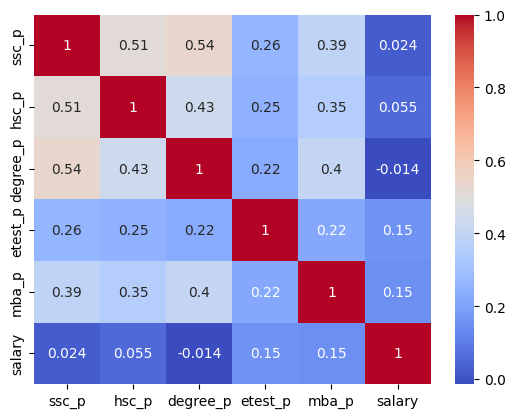

In [52]:
# Heatmap is used to show the relationship between two variables through color intensity,
# with warmer colors indicating higher values and cooler colors representing lower values
import matplotlib.pyplot as plt
sns.heatmap(dataset[quan].corr(), annot=True, cmap="coolwarm")
plt.show()

# Assignments
# Add comments for below method 'cal_vif'

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculating VIF
def cal_vif(X):

    # create Empty Dataframe to store columns and its vif values
    vif = pd.DataFrame()

    # store quantitative columns in vif column  "variable"
    vif["variable"] = X.columns

    # store each quantitative column's vif values in vif column  "VIF"
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [32]:
cal_vif(dataset[quan])

,variable,VIF
0,ssc_p,67.026700
1,hsc_p,56.131492
2,degree_p,112.755275
3,etest_p,33.696391
4,mba_p,108.585463
5,salary,15.167704


In [39]:
# here all the values are > 5 so we can try to remove columns with high value i.e degree_p
cal_vif(dataset[['ssc_p', 'hsc_p', 'etest_p', 'mba_p', 'salary']])

,variable,VIF
0,ssc_p,58.508846
1,hsc_p,53.809576
2,etest_p,33.074066
3,mba_p,78.749962
4,salary,15.161402


In [40]:
# here all the values are > 5 so we can try to remove columns with high value i.e mba_p
cal_vif(dataset[['ssc_p', 'hsc_p', 'etest_p', 'salary']])

,variable,VIF
0,ssc_p,48.214342
1,hsc_p,47.046708
2,etest_p,29.813465
3,salary,13.498356


In [41]:
# here all the values are > 5 so we can try to remove columns with high value i.e ssc_p
cal_vif(dataset[['hsc_p', 'etest_p', 'salary']])

,variable,VIF
0,hsc_p,25.379574
1,etest_p,26.355077
2,salary,13.337222
